# Entendimento de Projeto - Churn prediction

A churn prediction ou a rotatativdade de clientes, é uma técnica de analise dados para a antecipar a quais clientes tem uma probabilidade de maior de cancelamento de um serviço ou deixar um produto. Sendo emprega em diversos setores como instituições financeiras, varejo, telecomunicações.

Esse analise é extremamente imporntate visto que a saida ou um cancelamento de um cliente se tornar um custo caro para a empresa e podendo ser também um problema em questão de atendimento ou na oferta dos produtos.

Essa aplicação irá ajudar a prever clientes com maior probabiliade de deixar de fazer negocios com a empresa, assim perdindo uma adoção de estrategia diferente para buscar esse cliente novamente.


# Origem dos Dados
Os dados utilizados neste projeto foram originalmente disponibilizados na plataforma educacional da IBM Developer. Esses dados representam um cenário típico em uma empresa de telecomunicações. O conjunto de dados completo está acessível aqui.

Embora as informações explícitas sejam limitadas, os nomes das colunas oferecem insights sobre a natureza do problema abordado

In [ ]:
# Importação de Bibliotecas Fundamentais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

# Ignorar Avisos
warnings.filterwarnings('ignore')

# Importação de Bibliotecas para Aprendizado de Máquina e Pré-Processamento
from sklearn.datasets import make_classification
from sklearn.model_selection import (
    cross_val_score, GridSearchCV, train_test_split, RepeatedKFold
)
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Importação de Bibliotecas para Modelos de Classificação
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
)
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


# Importação de Bibliotecas para Balanceamento de Classes
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# Importação de Bibliotecas para Métricas de Avaliação
from sklearn.metrics import (
    classification_report, roc_auc_score, roc_curve,
    accuracy_score, recall_score, precision_score
)

# Análise Exploratória dos Dados(EAD)

Esse analise tem como objetivo proporcionar uma melhor analise das variaveis desse conjuto de dados.


1.   Contextualização das Variáveis
2.   Percentual de valores nulos

3.   Distribuição Equilibrada dos Dados
4.   Análise de Cancelamento por Genero

5.   Relação entre cancelamento e valor pago.
2.   Visualização de váriaveis por meio de boxplot.







In [ ]:
#visualizar o dataframe
df = pd.read_csv('telco_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#visualizar as variaves do dataFrame
print("Entradas: ", df.shape[0])
print("Variaveis: ", df.shape[1])

Entradas:  7043
Variaveis:  21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Notamos que a variavel 'TotalCharges" que reflete o total cobrado do cliente, está como object, mas deveria ser do tipo float. No entendo uma conversa direta não seja possível por posssiveis valores nulos. Assim caba-se uma realizar função dedicada

In [ ]:
def converter_str_float(enter):
  try:
    return float(enter)
  except:
    return np.nan

Essa função realiza a conversão de um valor string para o tipo float.



In [ ]:
#a coluna TotalCharges do DataFrame df está sendo transformada utilizando a função converter_str_float aplicada a cada valor individualmente.
df.TotalCharges = df.TotalCharges.map(converter_str_float)


Foi utlizando o .map por se tratar de apenas uma coluna. Caso fosse necessarios modificar mais de uma coluna, seria necessario utiliazar o .apply

In [ ]:
df.TotalCharges.isnull().sum()

11

In [ ]:
df.TotalCharges.fillna(df.TotalCharges.median(), inplace=True)

A coluna apresentou 11 valores nulos após ser convertida. Após isso esses valores ausentes foram preenchidos coma mediana, por haver valores altos

In [ ]:
df.dtypes



,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
#porcentagem de valores nulos
round((df.isnull().sum()/df.shape[0]).sort_values(ascending=True) *100,2)

,0
customerID,0.0
MonthlyCharges,0.0
PaymentMethod,0.0
PaperlessBilling,0.0
Contract,0.0
StreamingMovies,0.0
StreamingTV,0.0
TechSupport,0.0
DeviceProtection,0.0
TotalCharges,0.0


 calcula a porcentagem de valores nulos em cada coluna do DataFrame e exibe os resultados ordenados do menor para o maior.

In [ ]:
#quantidade de dados distribuidos por classe
df.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
#Verificar % de valores nulos
round(df.Churn.value_counts()/df.shape[0]*100,2)

,count
Churn,
No,73.46
Yes,26.54


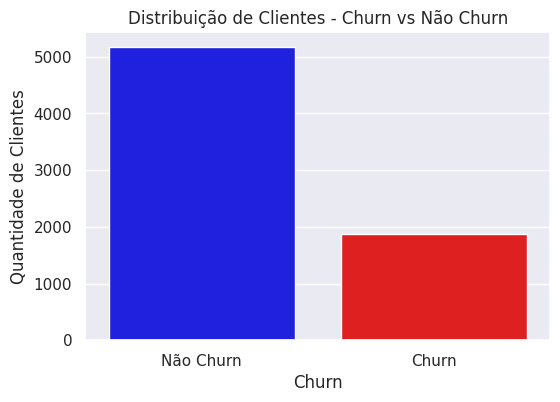

In [ ]:
# df e tenha uma coluna 'Churn' (1 = churn, 0 = não churn)
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Churn'], palette=['blue', 'red'])

plt.title('Distribuição de Clientes - Churn vs Não Churn')
plt.xlabel('Churn')
plt.ylabel('Quantidade de Clientes')
plt.xticks([0, 1], ['Não Churn', 'Churn'])
plt.show()

O conjunto apresenta um desequilibrio como uma taxa 26% de churn. É crucial realizar um balanço para desenolver um modelo eficaz.

In [ ]:
#analise de churn e genero
df.gender.value_counts()

,count
gender,
Male,3555
Female,3488


In [ ]:
#verificar % de valores distribuidos
round(df.gender.value_counts()/df.shape[0]*100,2)

,count
gender,
Male,50.48
Female,49.52


In [ ]:
#taxa de cancelamento por genero
df['gender'].loc[df['Churn'] == 'Yes'].value_counts()/df.gender.value_counts()*100

,count
gender,
Female,26.920872
Male,26.160338


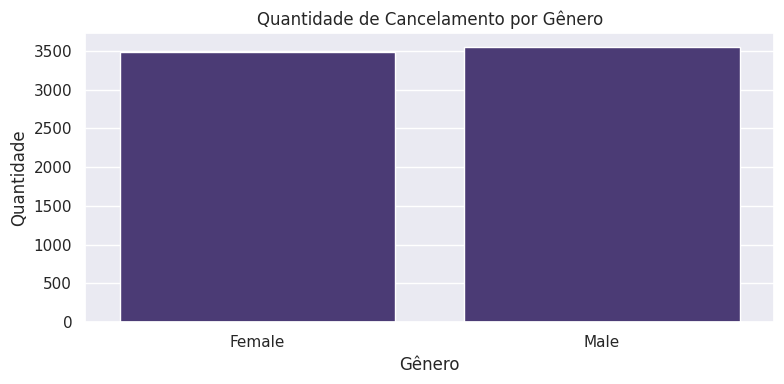

In [ ]:
#plotar grafico
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette("viridis")  # Ajustei a paleta de cores para "viridis"
count = df['gender'].loc[df.Churn == 'Yes'].value_counts()
sns.countplot(x='gender', data=df)
ax.set_xlabel('Gênero')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de Cancelamento por Gênero')
plt.tight_layout()



as medidas estão bastantes semelhantes, estando bem balanceada a quantidade de homens e mulheres.

In [ ]:
#pegar o tipo de contrato
df.Contract.value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [ ]:
#taxa de cancelamento por genero
df['Contract'].loc[df['Churn'] == 'Yes'].value_counts()/df.Contract.value_counts()*100

,count
Contract,
Month-to-month,42.709677
One year,11.269518
Two year,2.831858


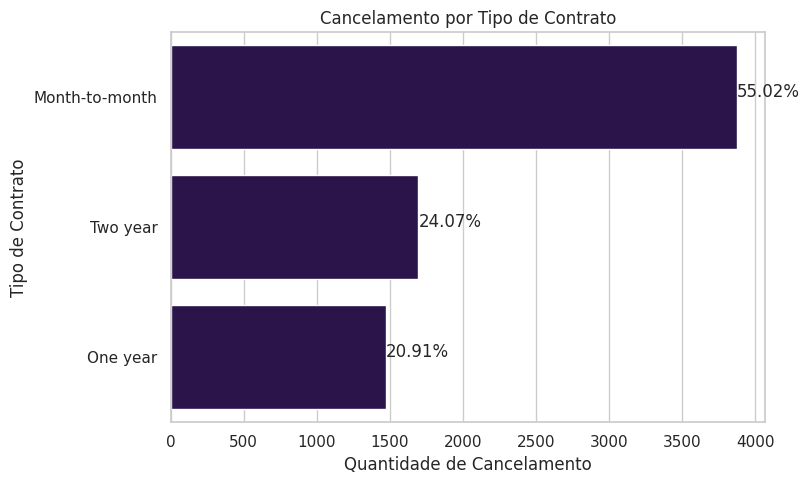

In [ ]:
# Plotar gráfico para as informações obtidas
plt.figure(figsize=(8, 5))

# Define informações iniciais referentes à coloração
sns.set(style="whitegrid")
sns.set_palette("inferno")

# Gráfico da quantidade de cancelamento por tipo de contrato
ax = sns.barplot(
    x=list(df.Contract.value_counts().values),
    y=list(df.Contract.value_counts().index),
    order=df.Contract.value_counts().sort_values(ascending=False).index
)
ax.set_xlabel('Quantidade de Cancelamento')
ax.set_ylabel('Tipo de Contrato')
ax.set_title("Cancelamento por Tipo de Contrato")
plt.tight_layout()

# Adicionar porcentagens nas barras
total = sum(df.Contract.value_counts().values)
for p in ax.patches:
    percentage = f'{100 * p.get_width() / total:.2f}%'
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

plt.show()



É possivel obsevar que os contratos do tipo Mês a Mês tem uma maior taxa de churn em relação aos contratos Two year e One year, que ambos exibem uma quantidade semelhante de churn.

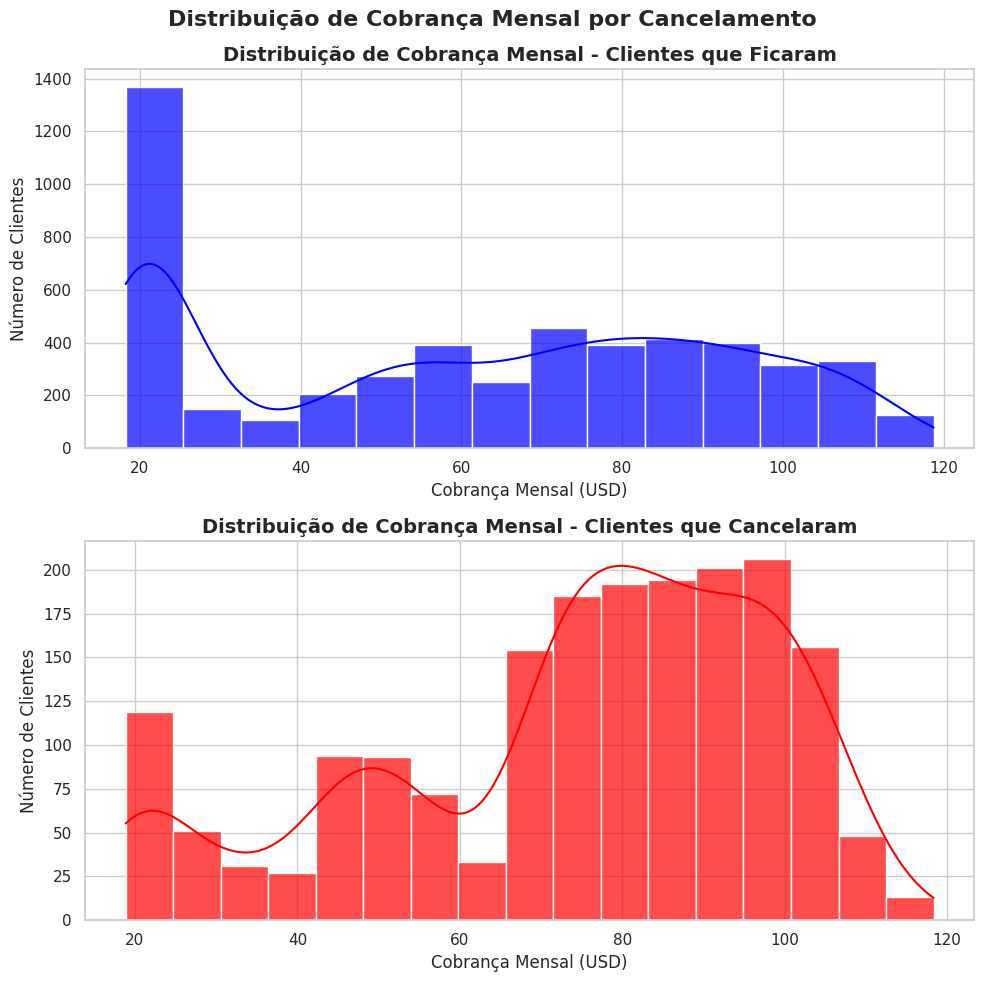

In [ ]:
# Criando a figura e os eixos
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Configurando o estilo do gráfico
sns.set_style("darkgrid")
sns.set_palette("viridis")

# Criando histograma para clientes que NÃO cancelaram
sns.histplot(
    data=df[df.Churn == 'No'],
    x="MonthlyCharges",
    kde=True,
    ax=ax[0],
    color="blue",
    alpha=0.7  # Transparência para melhor visualização
)

# Criando histograma para clientes que CANCELARAM
sns.histplot(
    data=df[df.Churn == 'Yes'],
    x="MonthlyCharges",
    kde=True,
    ax=ax[1],
    color="red",
    alpha=0.7
)

# Criando uma função para adicionar títulos e rótulos
def formatar_grafico(eixo, titulo):
    eixo.set_title(titulo, fontsize=14, fontweight="bold")
    eixo.set_xlabel("Cobrança Mensal (USD)")
    eixo.set_ylabel("Número de Clientes")

# Aplicando formatação nos gráficos
formatar_grafico(ax[0], "Distribuição de Cobrança Mensal - Clientes que Ficaram")
formatar_grafico(ax[1], "Distribuição de Cobrança Mensal - Clientes que Cancelaram")

# Título geral
fig.suptitle("Distribuição de Cobrança Mensal por Cancelamento", fontsize=16, fontweight="bold")

# Ajustando layout para evitar sobreposição
plt.tight_layout()
plt.show()

# Grafico não Churn (clientes que ficaram)


*   A maior parte de clients que ficaram pagam cerca de 20 doláres, como indica a grande barra no começo.
*  Depois você pode ver que os clientes estão distribuidos

*   Para valores mais altos, a retenção parece mais equilibrada, mas não há concentração tão grandes.

#Grafico de Chunr(clientes que sairam)


*   OS clientes que canceleram estão mais concentrados entre 60 e 100 dolares Mês.
*   Siginifica que muitos clientes que pagavam valores altos decidiram sair


*   Sé o preço for alto existe um alta chance de cancelamento
*   Ponto crítico a partir dos 60%











In [ ]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [ ]:
df.PaymentMethod.value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


Realizar boxplots de tenure, seniorCitizen, TotalCharges, MonthlyCharges

In [ ]:
def plot_boxplot(df,column_name):
  plt.figure(figsize=(5,3))
  sns.boxplot(y=df[column_name])
  plt.title(f'Boxplot da coluna {column_name}')
  plt.ylabel(column_name)
  plt.show()

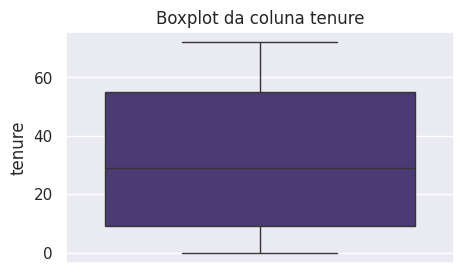

In [ ]:
plot_boxplot(df, "tenure")

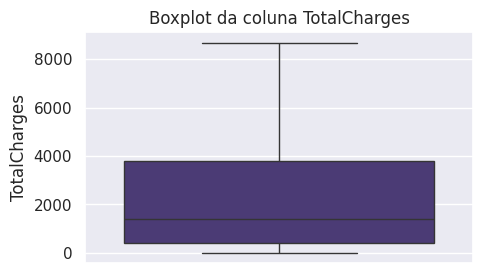

In [ ]:
plot_boxplot(df, "TotalCharges")

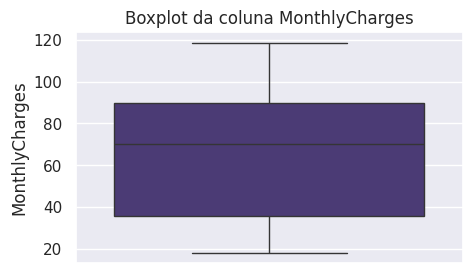

In [ ]:
plot_boxplot(df, "MonthlyCharges")

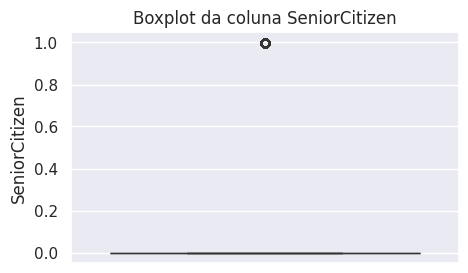

In [ ]:
plot_boxplot(df, "SeniorCitizen")

Estatisticamente não foram encontrados nenhum outiler na variaveis plotadas.

A Variavel tenure indica que o tempo de consumo do produto foi de 30 meses

A variavel MonthlyCharges indica que a mensalidade média foi de aproximadamente 70 unidades

A variavel TotalCharges indica que o valor total pago antingiu aproximadamente 1900 unidades.

# Preparação Dos Dados
Iremos utilizar um pre-processamento basico com o objetivo de construir um modelo base.



In [ ]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [ ]:
#remover customerId e gender
df_clean = df.drop(['customerID', 'gender'], axis=1)
df_clean.head(2)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [ ]:
#Criar um label enconder
le = LabelEncoder()

cols_to_encode = ['SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Contract', 'Churn']

for col in cols_to_encode:
  df_clean[col] = le.fit_transform(df_clean[col])




In [ ]:
# Imprime o dataframe com as colunas codificadas
df_clean[['SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Contract', 'Churn']].head()

,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Contract,Churn
0,0,1,0,0,1,0,0
1,0,0,0,1,0,1,0
2,0,0,0,1,1,0,1
3,0,0,0,0,0,1,0
4,0,0,0,1,1,0,1


In [ ]:
# Seleciona as colunas a serem codificadas como dummy
cols_to_encode = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'PaymentMethod']

# Aplica o get_dummies() em cada coluna selecionada
# Aplica get_dummies e converte para inteiro
df_dummies = pd.get_dummies(df_clean[cols_to_encode], prefix=cols_to_encode).astype(int)


# Concatena as variáveis dummy com o dataframe original
df_clean = pd.concat([df_clean, df_dummies], axis=1)

# Remove as colunas originais
df_clean.drop(cols_to_encode, axis=1, inplace=True)

In [ ]:
df_clean.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'Paym

In [ ]:
df_clean.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,1,0,56.95,1889.50,0,...,1,0,0,1,0,0,0,0,0,1
2,0,0,0,2,1,0,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,1,0,42.30,1840.75,0,...,1,0,0,1,0,0,1,0,0,0
4,0,0,0,2,1,0,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


# Modelos da Machine Learning

Com todo o pre-processamento e analise de dados feita. Iremos realizar na criação dos modelos de machine learning. Antes de realizar precisamos primeir os separar os dados testes que será usado para validar o modelo. Ser extremamente importante que o modelo possa generalizar para não gerar underfiting - quando o modelo não consegue ter um bom desempenho ou overfiting quando o modelo se atualiza muito e não consegue gerar novos dados. Extremamente importante fazer essa separação para que os dados testes e os de treinamento e validação não tenham contanto.
Adotarei 70/15/15 na separação para os conjuntos de treinamento, validação, testes.

In [ ]:
#criação de conjunto teste
test = df_clean.sample(frac=0.15, random_state=42)

#verificar o conjunto
print(test.shape)
test.head()


(1056, 38)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
185,0,1,0,1,0,0,1,24.80,24.80,1,...,1,0,0,1,0,0,0,0,1,0
2715,0,0,0,41,1,0,1,25.25,996.45,0,...,0,1,0,0,1,0,1,0,0,0
3825,0,1,1,52,1,2,0,19.35,1031.70,0,...,0,1,0,0,1,0,0,0,0,1
1807,0,0,0,1,1,0,0,76.35,76.35,1,...,1,0,0,1,0,0,0,0,1,0
132,0,0,0,67,1,2,0,50.55,3260.10,0,...,1,0,0,1,0,0,1,0,0,0


In [ ]:
#reset index
df_clean = df_clean.reset_index()
test = test.reset_index()

In [ ]:
df_clean = df_clean.reset_index(drop=True)
test = test.reset_index(drop=True)


# Aplicando método de padronização tenure, monthlyCharges e totalCharges

Objetivo: O preé-processamento foi feito para assegurar que as caracteristicas estejam na mesma escala, o que contribui para um melhor desempenho dos modelos de machine learning.

Para padronizar essas variaveis utilizaremos os StanderScale.

SantaderScale: melhora o desempenho dos modelos baseados em distancias - usando para transformar dados que tenham média 0 e desvio padrão 1


In [ ]:
#padronizar as colunas, tenure, MonthlyCharges e TotalCharges
df_new = df_clean.copy()
std_scaler = StandardScaler()
df_new['std_tenure'] = std_scaler.fit_transform(df_clean['tenure'].values.reshape(-1, 1))
df_new['std_MonthlyCharges'] = std_scaler.fit_transform(df_clean['MonthlyCharges'].values.reshape(-1, 1))
df_new['std_TotalCharges'] = std_scaler.fit_transform(df_clean['TotalCharges'].values.reshape(-1, 1))
df_new.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1, inplace=True)

#ver as entradas
df_new.head()

,index,SeniorCitizen,Partner,Dependents,PhoneService,Contract,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,std_tenure,std_MonthlyCharges,std_TotalCharges
0,0,0,1,0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,-1.277445,-1.160323,-0.994242
1,1,0,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,1,0.066327,-0.259629,-0.173244
2,2,0,0,0,1,0,1,1,1,0,...,1,0,0,0,0,0,1,-1.236724,-0.362660,-0.959674
3,3,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0.514251,-0.746535,-0.194766
4,4,0,0,0,1,0,1,1,1,0,...,1,0,0,0,0,1,0,-1.236724,0.197365,-0.940470


o porque de colocar o .value.reshape.

fit_transform(df_clean['tenure]) - Espera um array 2D, mas recebe 1D (Série pandas).

fit_transform(df_clean['tenure]).values) - Converte para NumPy, mas ainda está 1D.

fit_transform(df_clean['tenure'].values.reshape(-1, 1)) - Converte para um array 2D (n,1), como o StandardScaler espera.

Conjunto de treinamento e validação

Após a padronização dos conjuntos de dados, iremos seguir com a criação dos comjuntos de treinamento e validação.

In [ ]:
#separar variaveis x e y
X = df_new.drop('Churn', axis=1)
y = df_new['Churn']

#dividir dataset para treinamento e validacao
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, stratify=y, test_size=0.15, random_state=42)

Balancemaneto de Dados: Amostragem/ Tecnicas de Amostragem Oversampling e Undersampling

Quando mais de 50% das entradas de um conjunto de dados pertence a uma unica váriavel consideramos esse conjunto desbalanceado. Assim a maioria dos algoritmos de aprendizado funcionam melhor quando os dados estão bem distribuidos/equilibrados. Quando os dados estão desbalanceados o algoritmo de aprendizado tende a dar um maior vies a classe majoritaria.

Uma das maneiras de resolver esse problema seria com oversampling que envolve a geração de novos dados/exemplos para a classse minoritaria - Aumenta sua presença no conjunto de dados.
O oversampling ele não cria novos dados, aapenas replica os existentes, não abordando muito a falta de dados. Algumas literaturas ja mostram que ele não melhora muito a presença da classe minoritaria.

Undersampling - ele remove as instanscia da classe majoritaria, porém acabar deletado dados desse classe que possa ser importante, prejudicando o desempenho do modelo.

Assim utilizaremos o RandomUnderSampler - como nome diz vai fazer essa exclusão dos dados da classe majoritaria aleatoriamente



In [ ]:
#aplicando o ramdundersampling
run = RandomUnderSampler(random_state=42, sampling_strategy='majority')

X_under, y_under = run.fit_resample(X_train, y_train)

Iniciamos o balanceamento dos dados e utlizamos "majority" para realizar apenas a exclusão dos dados da classe majoritaria.

In [ ]:
#vizulizando o tamnaho do conjunto de treinamento
print("Tamanho do y_train", np.shape(y_train))
print("Tamanho do y_under", np.shape(y_under))

Tamanho do y_train (5986,)
Tamanho do y_under (3178,)


In [ ]:
#ver o balanceamento das classes
print(pd.Series(y_under).value_counts())

Churn
0    1589
1    1589
Name: count, dtype: int64


Apenas essas etapas pode-se notar que hove o balanceamento dos dados para a criação dos modelos de aprendizado.

Text(0.5, 0, 'Churn')

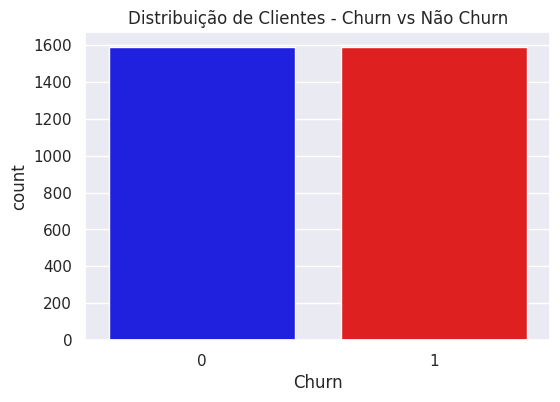

In [ ]:
#plotar a nova distribuição de churn
plt.figure(figsize=(6, 4))
sns.countplot(x=y_under, palette=['blue', 'red'])

plt.title('Distribuição de Clientes - Churn vs Não Churn')
plt.xlabel('Churn')

# Treinamento dos algoritmos de machine learning

Nesse fase, alguns modelos de machine learning. Para avaliar a efícacia dele em relação ao dados tratados, utilizaremos algumas métricas comuns para os modelos de classificação. como matriz de confusão, acurácia, recall, precisão e AUC. Daremos uma maior importancia para o recall que presenta a proporção de exemplos positivos.

Vamos criar modelos de algoritmos de aprendizado de máquina e aválialos com validação cruzada usando o recall.

1 - Regressão Logisticia: Ela é construiada a partir da aplicação de uma transformação chamda função logistica ou sigmoide. Ele é baseado em regressão linear, adptado para classificação binária.

2 - KNN  É um algoritmo onde o aprendizado é baseado "no quão similiar" é um dado(vetor) do outro, sendo formado o treinamento por vetores de n dimensões.

3 - Árvore de Decisão - sua composição de algoritmo se dá a similaridade de um fluxograma com etapas faceis de entender e visualizar.

4 - Radom Forest representam uma das formas mais simplificadas de um sistema de suporte á decisão.

5 - o SVM é um algoritmo que busca uma linha de speração classes distintas analisando 2 pontos, um de cada grupo. Busca encontar o hiperplano que melhor separa as clases no espaço das caracteriscticas.

XGBoost é algoritmo de aprendizado de máquina, baseado em árvore de decisão e que utliza uma estrutura de gradient boosting permitindo assim a construição de modelos de forma iterativa, adicionando novos modelos que corrigem os erros dos modelos anteriores.



In [ ]:
#Instanciando os classificadores
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
xgboost = XGBClassifier(random_state=42)

# Validação Cruzada (Cross - validation)
É um jeito esperto de testar um modelo de machine learning. Em vez de treinar e testar o modelo sempre com os mesmos dados, a gente divide os dados em pedeços (chamando de folds), depois treinamos o modelo em alguns pedaços e repetimos esse processo.

5x2 CV - isso significa que iremos repetir esse processo 5 vezes, mas agora dividmos os dados em apenas 2 partes ( 50% treino e 50% teste) - modelo útil quando os dados são menores.



In [ ]:
# Criação dos classificadores
classifiers = {
    'Logistic Regression': lr,
    'K-Nearest Neighbors': knn,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Support Vector Machine': svm,
    'XGBoost': xgboost
}

recall = []
model = []

# Realizando a validação cruzada
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)

X_under_np = X_under.to_numpy()
y_under_np = y_under.to_numpy()

for name, clf in classifiers.items():  # <- Corrigido para iterar corretamente
    scores = []
    for train_index, test_index in cv.split(X_under_np, y_under_np):
        # Dados divididos em treino e teste
        X_train_cv, X_test_cv = X_under_np[train_index], X_under_np[test_index]
        y_train_cv, y_test_cv = y_under_np[train_index], y_under_np[test_index]

        clf.fit(X_train_cv, y_train_cv)
        y_pred = clf.predict(X_test_cv)

        # Recall calculado e adicionado à lista de pontuação
        recall_iter = recall_score(y_test_cv, y_pred)
        scores.append(recall_iter)

    recall.append(np.mean(scores))
    model.append(name)

# Ordenando os modelos pelo recall
recall_sorted, model_sorted = zip(*sorted(zip(recall, model), reverse=True))

# Exibir os resultados em um DataFrame
df_results = pd.DataFrame(data=recall_sorted, index=model_sorted, columns=['Recall'])
print(df_results)


                          Recall
Logistic Regression     0.792387
Random Forest           0.770487
XGBoost                 0.755568
Decision Tree           0.681428
K-Nearest Neighbors     0.506245
Support Vector Machine  0.455194
